# **Periodic Factor Method**

This notebook will use the periodic factor method that explores multivariate relationships between 2 variables to determine sales.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set directory
%cd /content/drive/My Drive/Colab Notebooks/ML Project/

/content/drive/My Drive/Colab Notebooks/ML Project


In [ ]:
# Import Dataset
df_test = pd.read_csv("test.csv",parse_dates=['date'], index_col=1)
df_train = pd.read_csv("train.csv", parse_dates=['date'],index_col=0)

combined_df = pd.concat([df_train,df_test])

In [ ]:
df_train.head(1)

,store,item,sales
date,,,
2013-01-01,1,1,13


## Creating Exogeneous Variables

In [ ]:
def expand_df(df):
    df['week'] = df.index.week
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofmonth'] = df.index.day
    df['dayofyear'] = df.index.dayofyear
    return df

df_train_exog = expand_df(df_train)
df_test_exog = expand_df(df_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


## **Exploring relationship between sales and other variables**

We plotted the values of each exogeneous variables as a percentage of average sales in order to see how the values change.

E.g. Get average sales across week, then get average sales across each day of week, and represent sales on each day of week as a percentage of average sales over whole week.

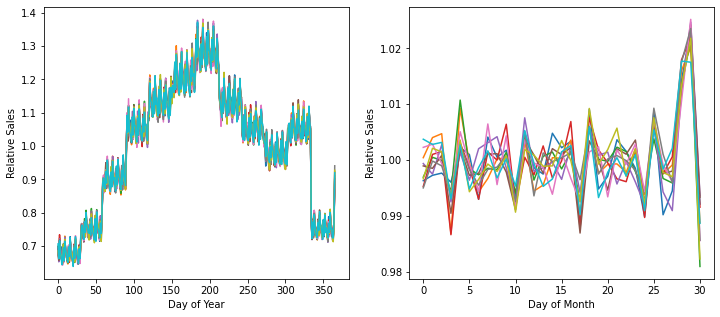

In [ ]:
agg_dayofyear = pd.pivot_table(df_train_exog, index='dayofyear', columns='store',
                               values='sales', aggfunc=np.mean).values

agg_dayofmonth = pd.pivot_table(df_train_exog, index='dayofmonth', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_dayofyear / agg_dayofyear.mean(0)[np.newaxis])
plt.xlabel("Day of Year")
plt.ylabel("Relative Sales")

plt.subplot(122)
plt.plot(agg_dayofmonth / agg_dayofmonth.mean(0)[np.newaxis])
plt.xlabel("Day of Month")
plt.ylabel("Relative Sales")
plt.show()

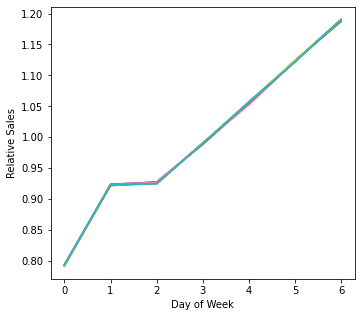

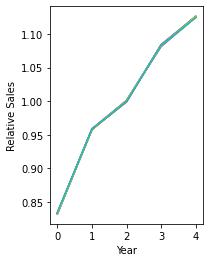

In [ ]:
agg_dayofweek = pd.pivot_table(df_train_exog, index='dayofweek', columns='store',
                                values='sales', aggfunc=np.mean).values

agg_year = pd.pivot_table(df_train_exog, index='year', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_dayofweek / agg_dayofweek.mean(0)[np.newaxis])
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.show()

plt.subplot(122)
plt.plot(agg_year / agg_year.mean(0)[np.newaxis])
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

We observe a very strong relationship between the day of week and sales.

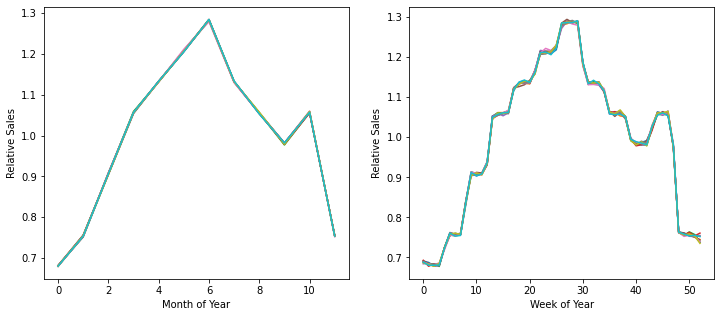

In [ ]:
agg_month = pd.pivot_table(df_train_exog, index='month', columns='store',
                               values='sales', aggfunc=np.mean).values

agg_week = pd.pivot_table(df_train_exog, index='week', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month / agg_month.mean(0)[np.newaxis])
plt.xlabel("Month of Year")
plt.ylabel("Relative Sales")

plt.subplot(122)
plt.plot(agg_week / agg_week.mean(0)[np.newaxis])
plt.xlabel("Week of Year")
plt.ylabel("Relative Sales")
plt.show()

We observe a slightly decent relationship between week/month of year and sales.

## **Explaining Relationship**

As seen from the previous graphs, there are unique relationships between sales and certain exogeneous variables. However, they do not appear linear/quadratic/etc. in nature (such that some curve would be able to plot them).

> In fact, it appears that the data is artificially generated with certain variations according to certain exogeneous variables.

As such, instead of using a general time series forecasting algorithm with exogeneous variables to forecast some kind of trend (since no clear trend is seen), it would be better to use some kind of table to determine the multiplier of the value.

E.g. If sunday was 70% of average sales, we could predict sales then multiple it by 0.7 to get sunday's sales.

item,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
store,,,,,,,,,,,,,,,,,,,,,
1,19.971522,53.148959,33.208105,19.956188,16.612815,53.060789,52.783680,69.472070,46.504929,66.354326,...,20.002738,33.105696,46.242607,26.594195,72.720701,52.845016,19.814348,46.546002,26.461665,59.342826
2,28.173604,75.316539,46.992333,28.234940,23.540526,74.945235,75.058598,99.090361,65.478094,94.097481,...,28.069551,47.368018,65.785323,37.785871,103.381161,75.219606,28.187842,66.028478,37.711939,84.622125
3,25.070099,66.804491,41.771084,25.116101,20.857612,67.007119,66.647864,87.517525,58.486857,83.387733,...,24.989047,41.797371,58.197700,33.386090,91.851041,66.748083,25.120482,58.700986,33.259584,74.958379
4,22.938664,61.715225,38.548193,23.086528,19.525192,61.270537,61.625411,80.819825,54.043812,77.047645,...,23.168127,38.539978,54.018620,30.952355,84.687295,61.420044,23.114458,53.765608,30.840635,68.921687
5,16.739321,44.488499,27.835706,16.776561,14.086528,44.564622,44.535597,58.565717,38.837349,55.509858,...,16.830778,27.730559,39.163198,22.415115,61.427163,44.734940,16.699343,39.281490,22.371851,50.319277
6,16.717963,44.533954,27.811062,16.754107,13.893209,44.503834,44.599124,58.385542,39.460022,55.565170,...,16.607338,27.893209,39.034502,22.322563,61.142935,44.539978,16.708653,39.052574,22.181271,50.516429
7,15.159365,40.717963,25.531216,15.358160,12.733844,40.703724,40.709748,53.723987,35.901972,51.156627,...,15.471522,25.435926,35.426068,20.446331,55.905805,40.828587,15.479189,35.624315,20.406353,45.823658
8,26.983571,71.656627,45.076123,26.948521,22.427711,71.958379,71.730559,94.461117,63.193319,89.818182,...,27.036145,45.144031,62.980285,36.194414,98.941402,72.004929,27.150055,62.737130,36.035049,80.972070
9,23.325849,61.792442,38.535049,23.150055,19.272180,61.412377,61.812158,81.287514,54.105696,77.105148,...,23.191128,38.643483,54.152793,30.968237,85.093647,62.010953,23.003286,53.976999,31.052574,69.308324


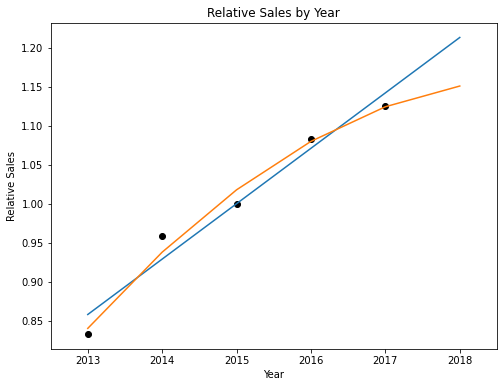

Relative Sales fitted with Linear Regression = 1.2132
Relative Sales fitted with Quadratic Regression = 1.1509


In [ ]:
grand_avg = df_train_exog.sales.mean() # Average sales
# grand_avg = max(df_train_exog.sales)

# These are the variables that exhibit some kind of relationship.
# agg_dayofyear
# agg_dayofmonth
# agg_dayofweek
# agg_year
# agg_month
# agg_week

# Item-Store Look Up Table
store_item_table = pd.pivot_table(df_train_exog, index='store', columns='item', values='sales', aggfunc=np.mean)
display(store_item_table)

# Daily pattern (Across Years)
dayofyear_table = pd.pivot_table(df_train_exog, index='dayofyear', values='sales', aggfunc=np.mean)
dayofyear_table.sales /= grand_avg

# Daily pattern (Across Months)
dayofmonth_table = pd.pivot_table(df_train_exog, index='dayofmonth', values='sales', aggfunc=np.mean)
dayofmonth_table.sales /= grand_avg

# Daily pattern (Across Week)
dayofweek_table = pd.pivot_table(df_train_exog, index='dayofweek', values='sales', aggfunc=np.mean)
dayofweek_table.sales /= grand_avg

# Yearly pattern
year_table = pd.pivot_table(df_train_exog, index='year', values='sales', aggfunc=np.mean)
year_table.sales /= grand_avg

years = np.arange(2013, 2019)
annual_sales_avg = year_table.values.squeeze()

# Monthly pattern
month_table = pd.pivot_table(df_train_exog, index='month', values='sales', aggfunc=np.mean)
month_table.sales /= grand_avg

# Weekly pattern
week_table = pd.pivot_table(df_train_exog, index='week', values='sales', aggfunc=np.mean)
week_table.sales /= grand_avg

years = np.arange(2013, 2019)
annual_sales_avg = year_table.values.squeeze()

line1 = np.poly1d(np.polyfit(years[:-1], annual_sales_avg, 1))
line2 = np.poly1d(np.polyfit(years[:-1], annual_sales_avg, 2))

plt.figure(figsize=(8,6))
plt.plot(years[:-1], annual_sales_avg, 'ko')
plt.plot(years, line1(years), 'C0-')
plt.plot(years, line2(years), 'C1-')
plt.xlim(2012.5, 2018.5)
plt.title("Relative Sales by Year")
plt.ylabel("Relative Sales")
plt.xlabel("Year")
plt.show()

print(f"Relative Sales fitted with Linear Regression = {line1(2018):.4f}")
print(f"Relative Sales fitted with Quadratic Regression = {line2(2018):.4f}")

# We pick the quadratic fit
annual_growth = line2

## **Improvements on Quadratic Fit**

However, we can see that the quadratic fit is slightly underforecasting the growth rate in 2019 as well. Therefore we introduced additional variables to account for the tuning of said observed recency effect.

Therefore, we tried using an additional **multiplication factor** to negate this under-forecast

> Eqn: sales = avg_sales*1.1509 * 1.00x, where x = range(1,9)

We also tested it by adding a **constant** to the final forecast

> Eqn: sales = avg sales*1.1509 + x, where x = range(-1,1)


Note: This was done after the general forecast when our model peaked in performance.


In [ ]:
annual_growth = annual_growth*1.009

## **Running Model**

The model works by first getting the average sales price given an item and store. Note that since each item and store are their own time series, it was better to separate them into their own average sales.

After which, we went to multiply the multiplication effects given the exogeneous variables.

Lastly, we multiplied it by the growth rate, as observed in the trends across years.


**Iterative Approach**

We did an iterative approach to the model, and removed exogeneous variables which had the most noise one by one. When we included all values, we got a private and public score of 39.30698 and 75.03988 respectively. We removed day of year (since it appeared to have the most fluctuation). We then got 22.92815 and 39.52614. Finally, we observed the best result when using day of week and month, at 12.62071 and 13.88569.


We then used the improvements on quadratic fit method mentionedabove to fit the result even more accurately. We managed to get a final score of 12.59735 and 13.87908, placing 18 place in the competition out of 461, top 4%.



In [ ]:
def sales_forecast(test):

# agg_dayofyear
# agg_dayofmonth
# agg_dayofweek
# agg_year
# agg_month
# agg_week

    prediction = []

    for _, row in test.iterrows():
        # dayofyear, dayofmonth, dayofweek, year, month, week = row.name.dayofyear, row.name.dayofmonth, row.name.dayofweek, row.name.year, row.name.month, row.name.week
        dayofyear, dayofweek, year, month, week = row.name.dayofyear, row.name.dayofweek, row.name.year, row.name.month, row.name.week

        item, store = int(row['item']), int(row['store'])
        base_sales = store_item_table.at[store, item]

        mul = (
            # dayofyear_table.at[dayofyear, 'sales'] * 
            # dayofmonth_table.at[dayofmonth, 'sales'] *
            dayofweek_table.at[dayofweek, 'sales'] *
            month_table.at[month, 'sales']
            # week_table.at[week, 'sales']
        )
        
        pred_sales = base_sales * mul * annual_growth(year)
        prediction.append(pred_sales)

    test['sales'] = prediction
    test = test.drop(['month', 'year', 'week', 'dayofweek', 'dayofmonth', 'dayofyear'], axis=1)
    return test

forecast = sales_forecast(df_test_exog)
forecast
forecast.to_csv("results.csv", index=False)



In [ ]:
forecast

,id,store,item,sales
date,,,,
2018-01-01,0,1,1,12.502717
2018-01-02,1,1,1,14.553709
2018-01-03,2,1,1,14.596742
2018-01-04,3,1,1,15.609134
2018-01-05,4,1,1,16.645463
...,...,...,...,...
2018-03-27,44995,10,50,71.845080
2018-03-28,44996,10,50,72.057517
2018-03-29,44997,10,50,77.055237
